# Lab 3 Exploration: Customer Churn 



Muchiri Kahwai  
Lab Partner : Johnson Subedi  
DSC 305 S23 
Lab 3: Customer Churn

## Import Libraries

Before starting this analysis, it is essential to import the relevant libraries. Pandas is a robust library that is widely used for data analysis and manipulation. It enables us to read data from a CSV file and store it in a Pandas DataFrame object. Numpy is a linear algebra library that offers extensive support for numerical computations. Additionally, to create data visualizations, we can use the powerful data visualization libraries such as Matplotlib and Seaborn.


In [14]:
# Importing relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


## Exploratory Data Analysis

### Import the Dataset

Afterward, we proceed to import the CSV file into our program. For this purpose, we utilize the Pandas library to read and load the dataset into a DataFrame data structure.

In [15]:
# Importing the csv file
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [16]:
# Display first few rows of the dataset
print(data.head())



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [17]:
# Summary of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The features (independent variables) customerID,gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, and PaymentMethod are categorical, while SeniorCitizen, tenure, MonthlyCharges, and TotalCharges are numerical. the variable TotalCharges is currently stored as an object, so we may need to convert it to a numerical data type before proceeding with analysis or modeling.

In [18]:
# Get shape of the dataset
data.shape

(7043, 21)

The dataset has 7043 rows and 21 columns.

In [19]:
# Get column names
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Summary statistics and missing values

In [20]:
# Display basic statistics of the dataset
data.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


1. The mean value for SeniorCitizen is 0.162, which suggests that the majority of customers are not senior citizens.
2. The mean value for tenure is 32.37 months, with a standard deviation of 24.56 months. This indicates that the length of time that customers have been with the company varies widely.
3. The mean value for MonthlyCharges is 64.76 USD, with a standard deviation of 30.09. This suggests that the monthly charges for customers vary considerably.
4. The minimum value for tenure is 0, which could indicate that some customers are new and have not been with the company for a full month yet.
5. The minimum value for MonthlyCharges is 18.25 USD , which could indicate that some customers are on a lower-priced plan or have fewer services.
6. The maximum value for tenure is 72 months, which indicates that some customers have been with the company for a long time.
7. The maximum value for MonthlyCharges is 118.75 USD, which suggests that some customers may be on a higher-priced plan or have more services.
8. The standard deviations for tenure and MonthlyCharges are relatively large, which could indicate that the distribution of values is wide and that there is considerable variation among customers.

In [21]:
# Check for missing values
print(data.isnull().sum())


# Check for duplicate rows
print("The number of duplicate rows is :", data.duplicated().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
The number of duplicate rows is : 0


There is no missing data or duplicated rows. 

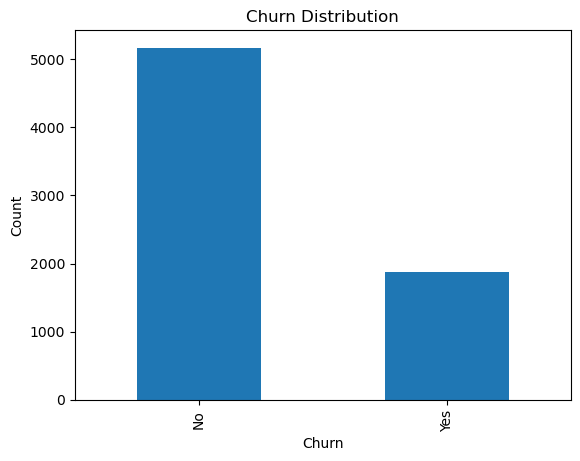

In [22]:
# Visualize the distribution of the target variable (churn)
churn_counts = data['Churn'].value_counts()
churn_counts.plot(kind='bar', title='Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


The number of customers who do not churn is more than double of those who  churn. This suggests that the business has a higher number of loyal customers.

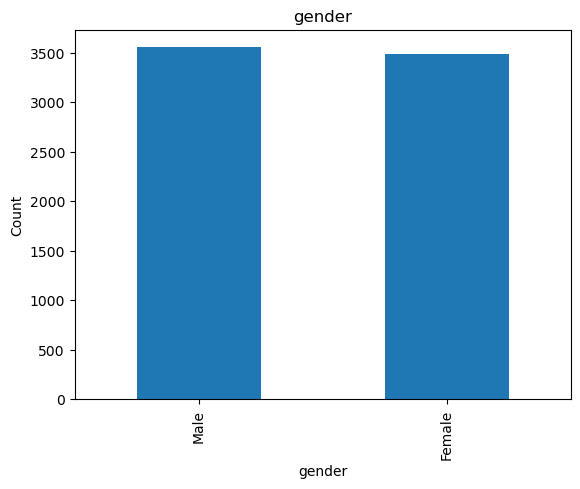

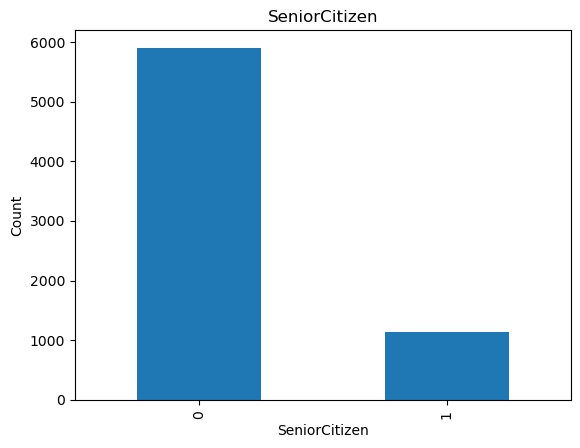

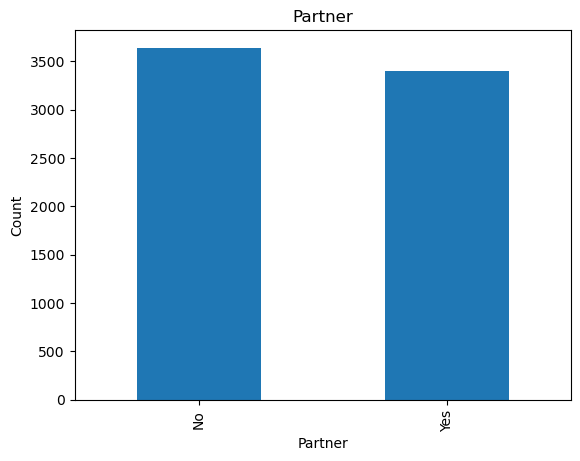

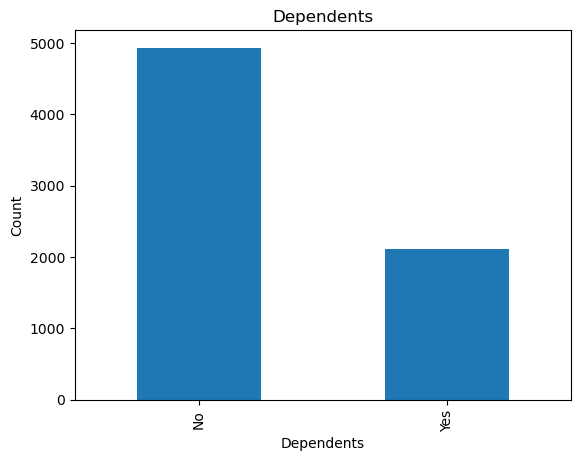

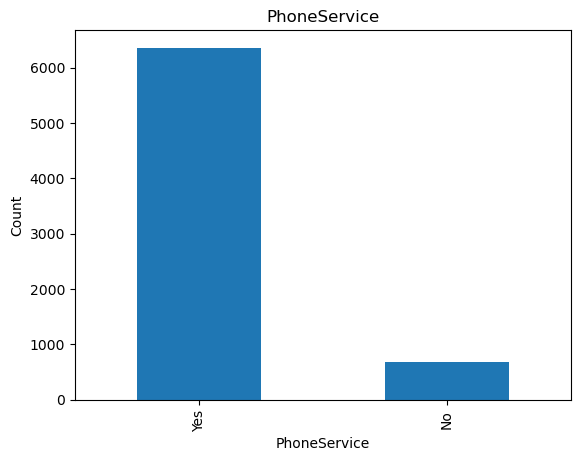

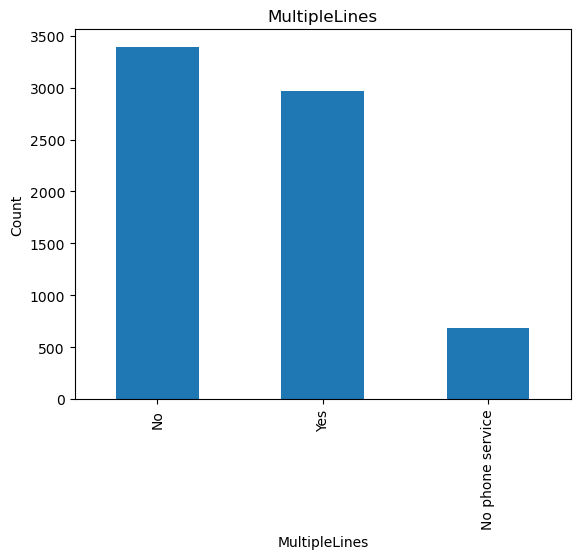

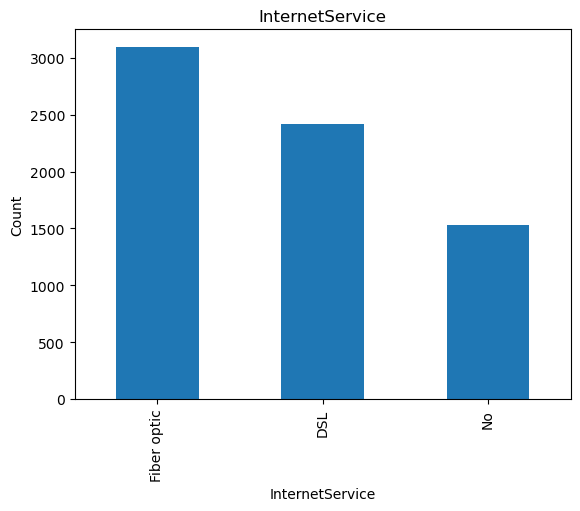

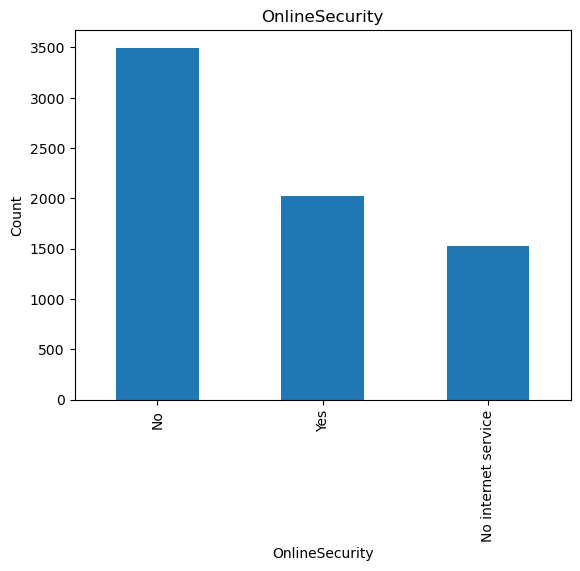

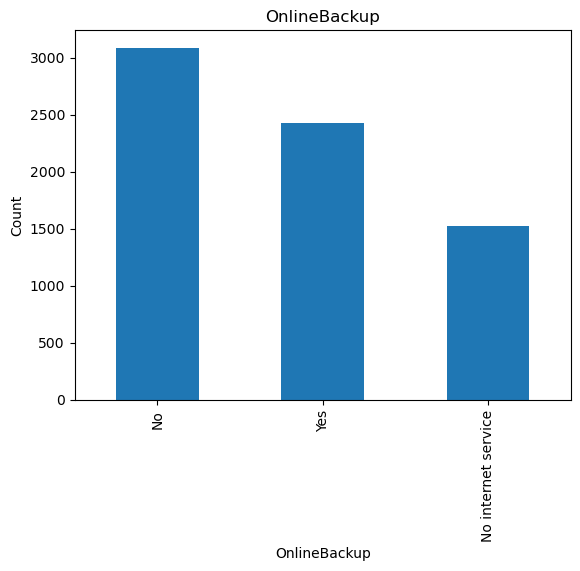

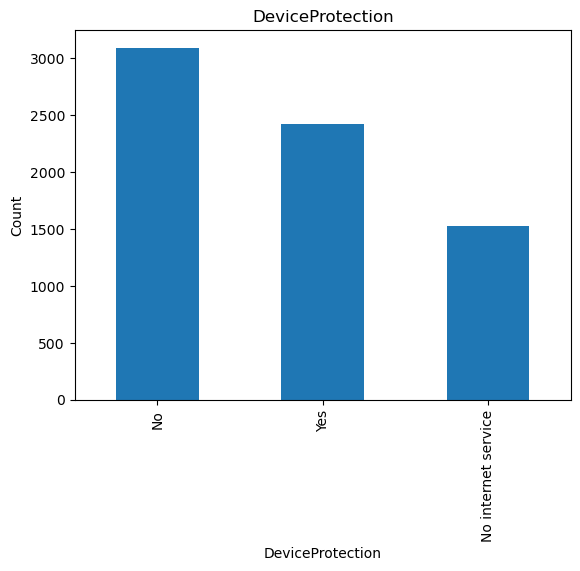

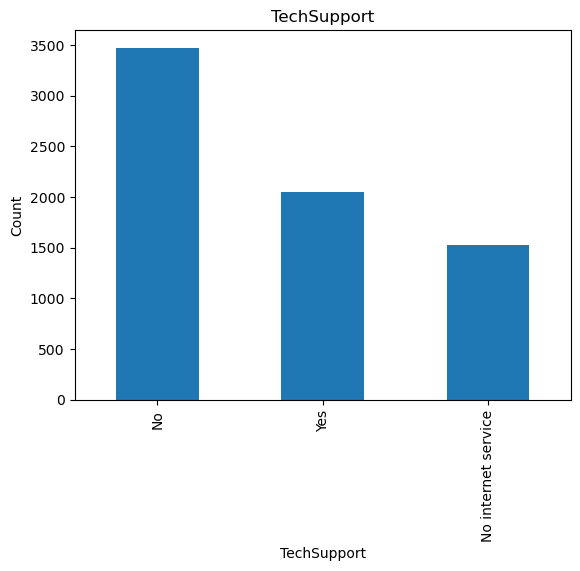

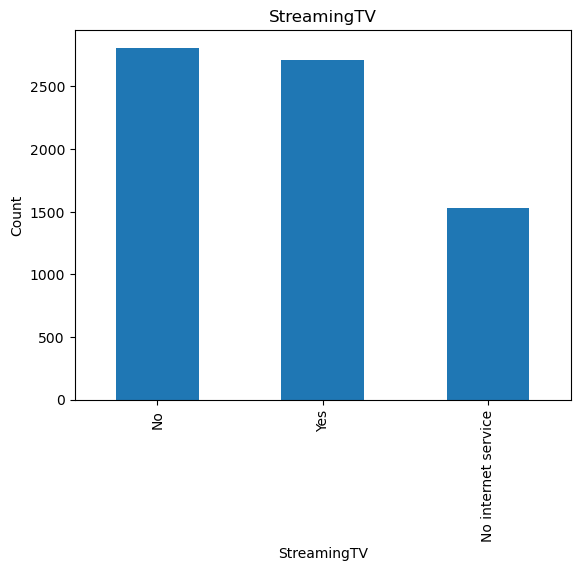

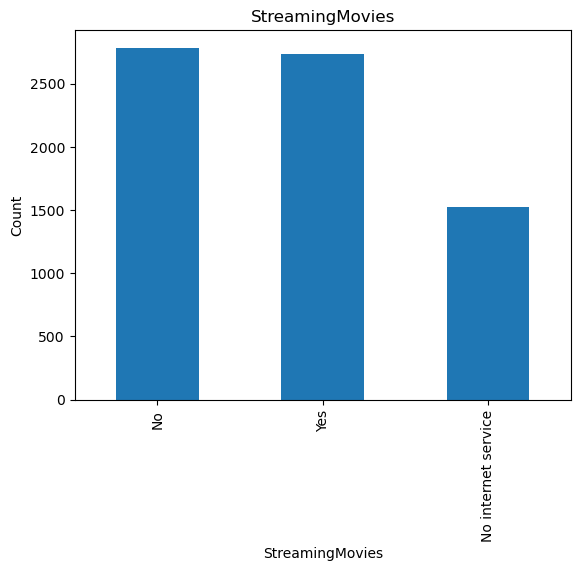

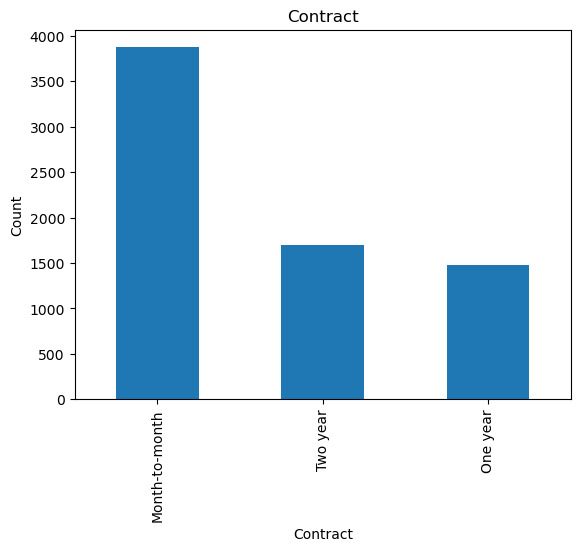

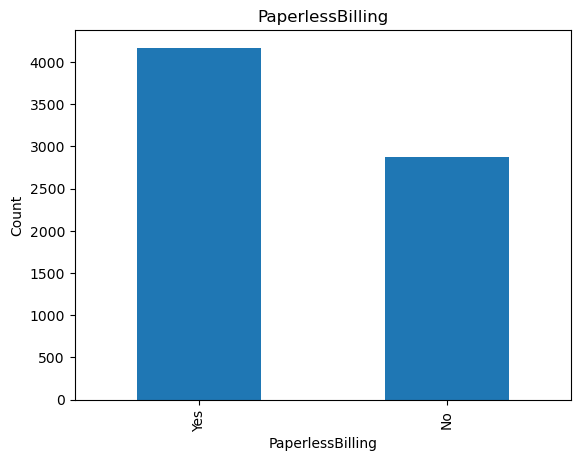

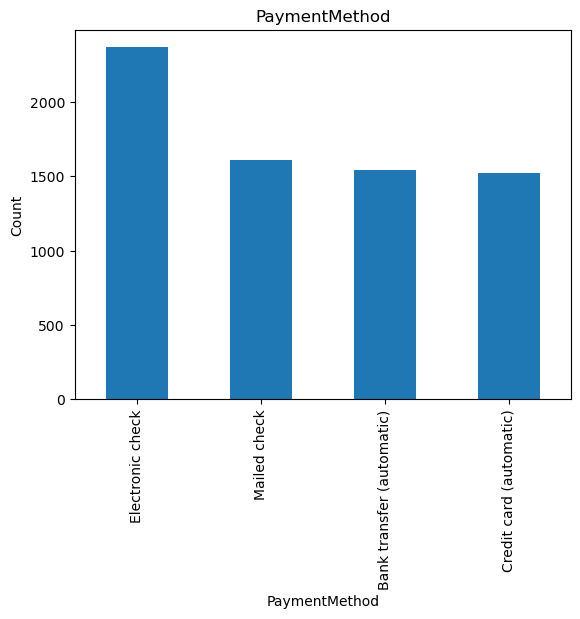

In [23]:
# Visualize the distribution of categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    data[feature].value_counts().plot(kind='bar', title=feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


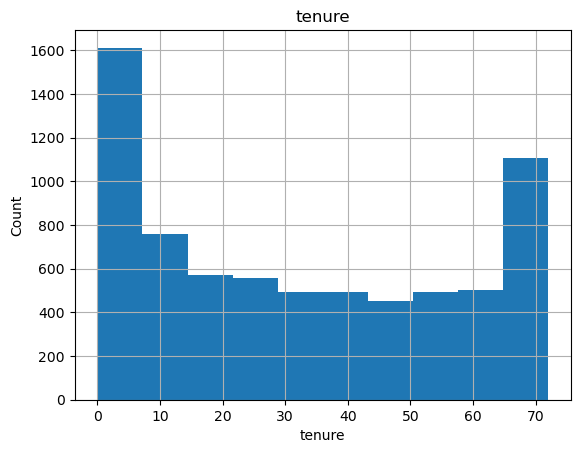

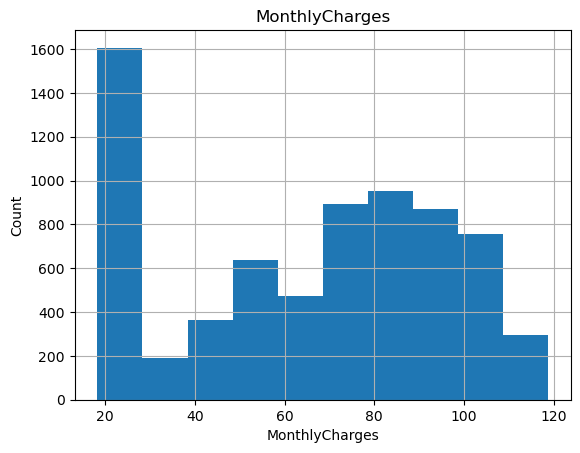

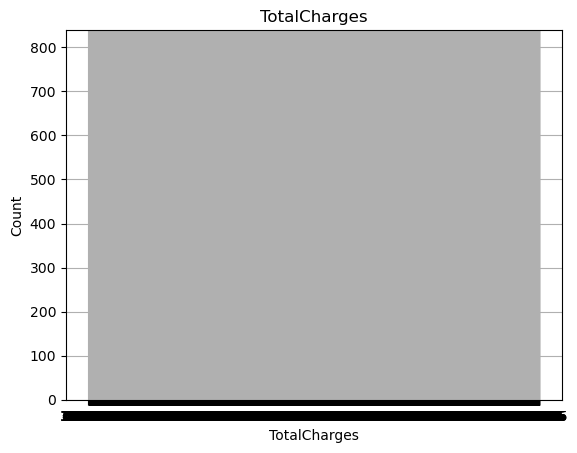

In [24]:
# Visualize the distribution of numeric features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numeric_features:
    data[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

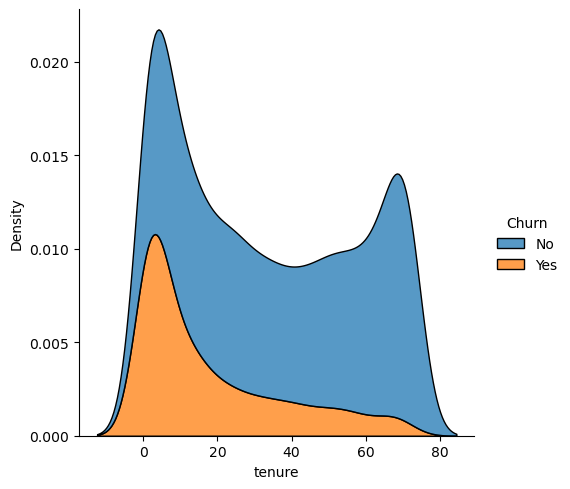

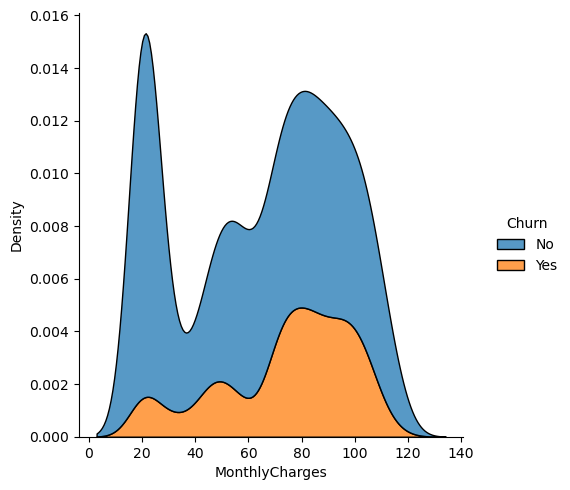

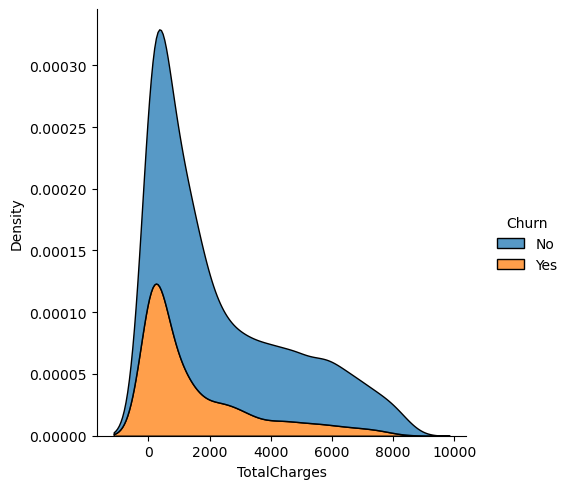

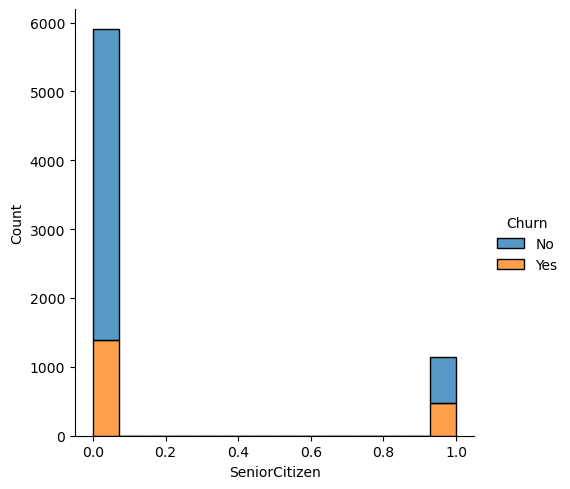

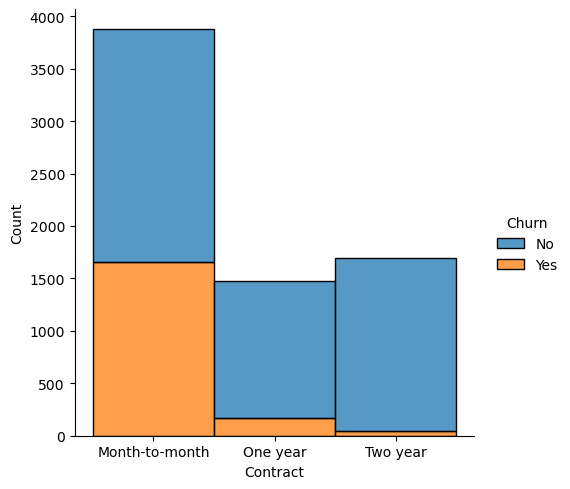

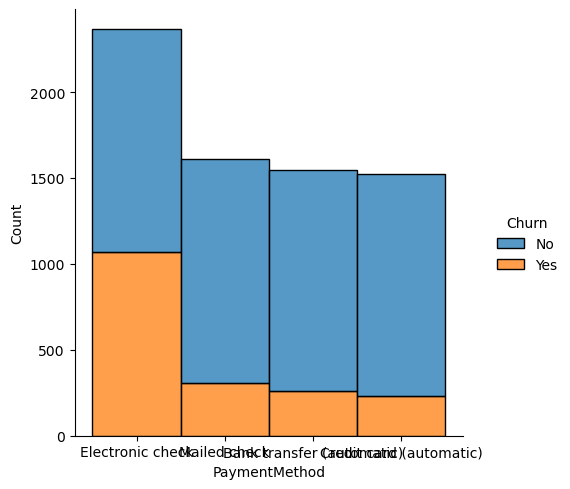

In [51]:
import seaborn as sns

sns.displot(data, x='tenure', hue='Churn', kind='kde', multiple='stack')
sns.displot(data, x='MonthlyCharges', hue='Churn', kind='kde', multiple='stack')
sns.displot(data, x='TotalCharges', hue='Churn', kind='kde', multiple='stack')
sns.displot(data, x='SeniorCitizen', hue='Churn', kind='hist', multiple='stack')
sns.displot(data, x='Contract', hue='Churn', kind='hist', multiple='stack')
sns.displot(data, x='PaymentMethod', hue='Churn', kind='hist', multiple='stack')
plt.show()


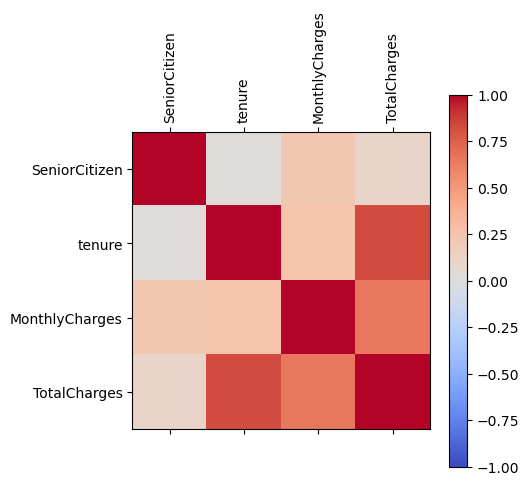

In [53]:
corr_matrix = data.corr()
plt.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


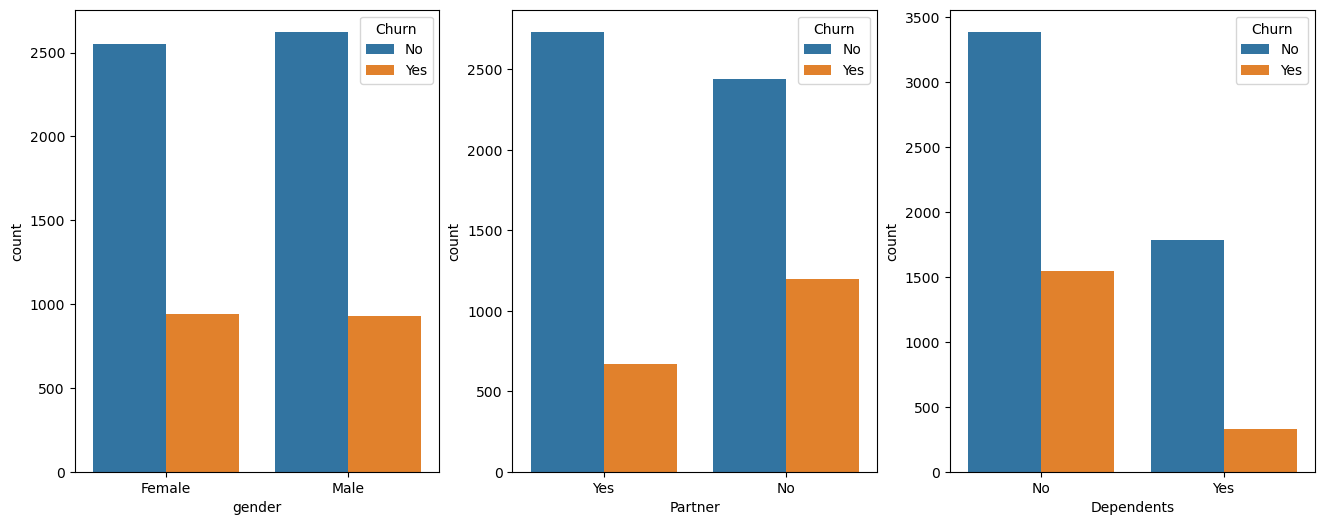

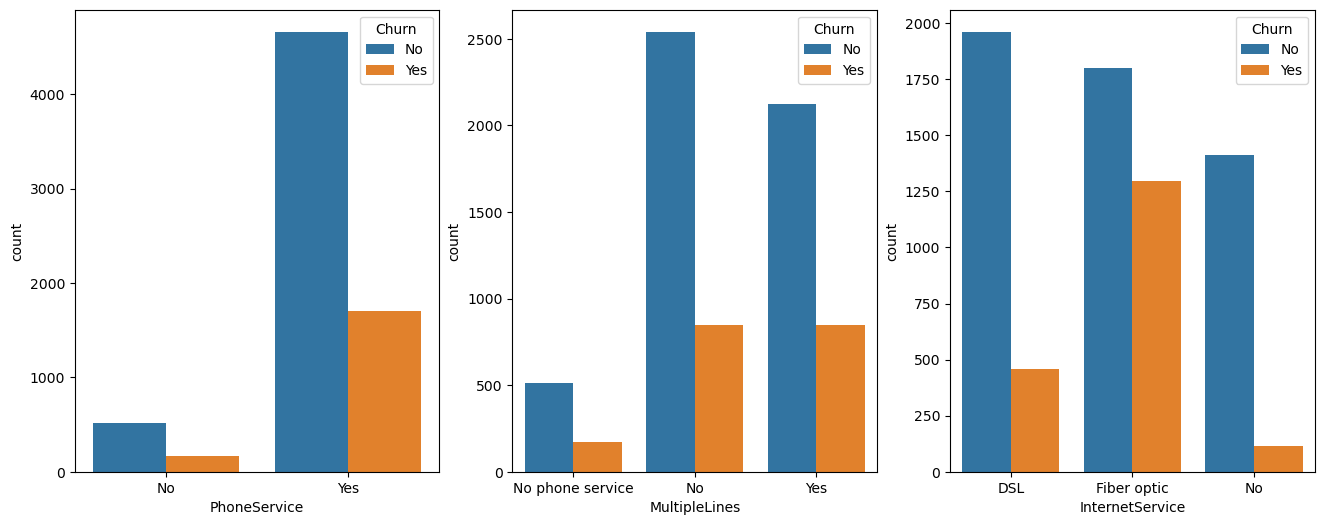

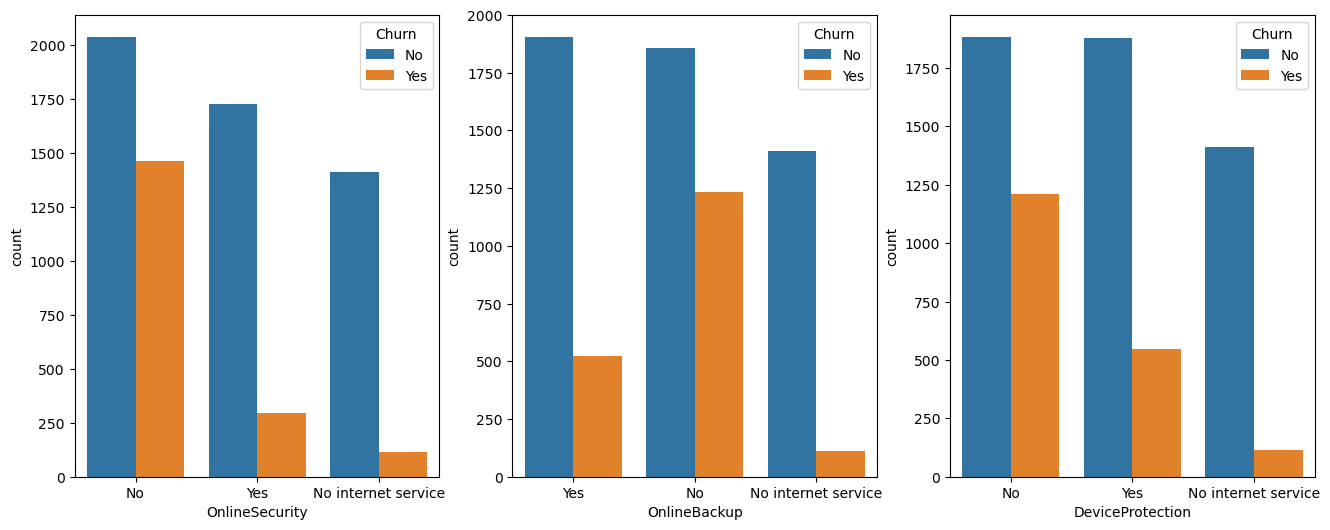

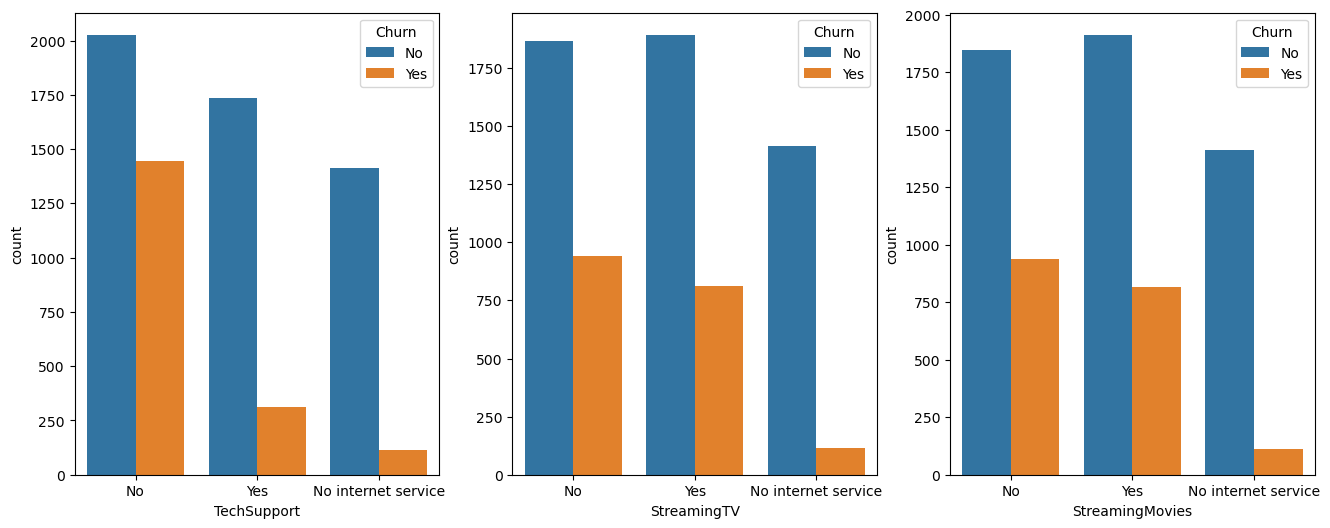

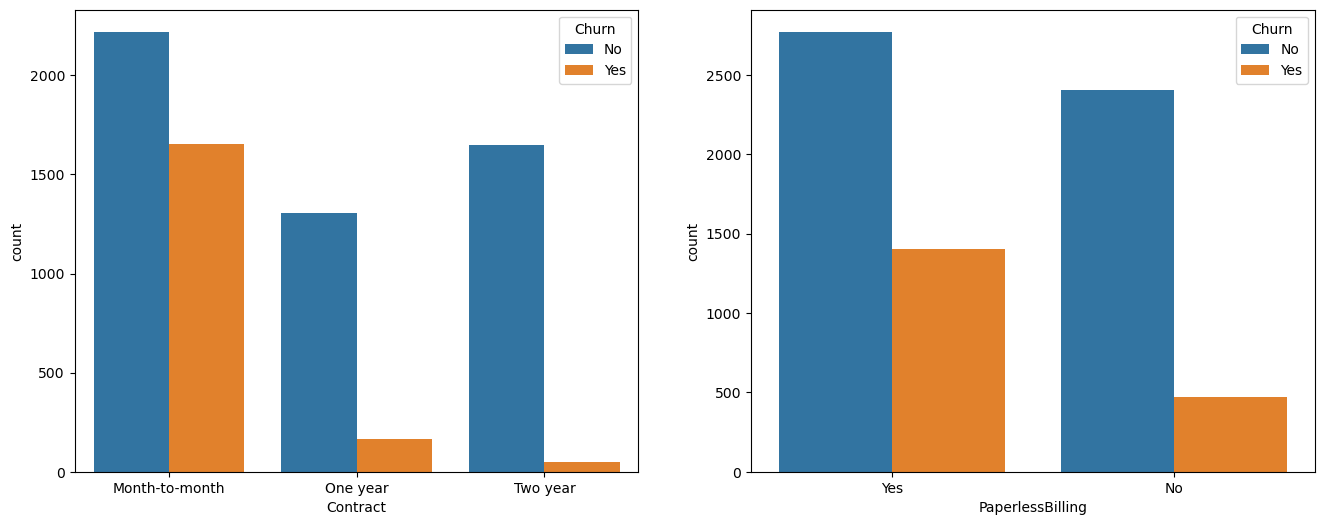

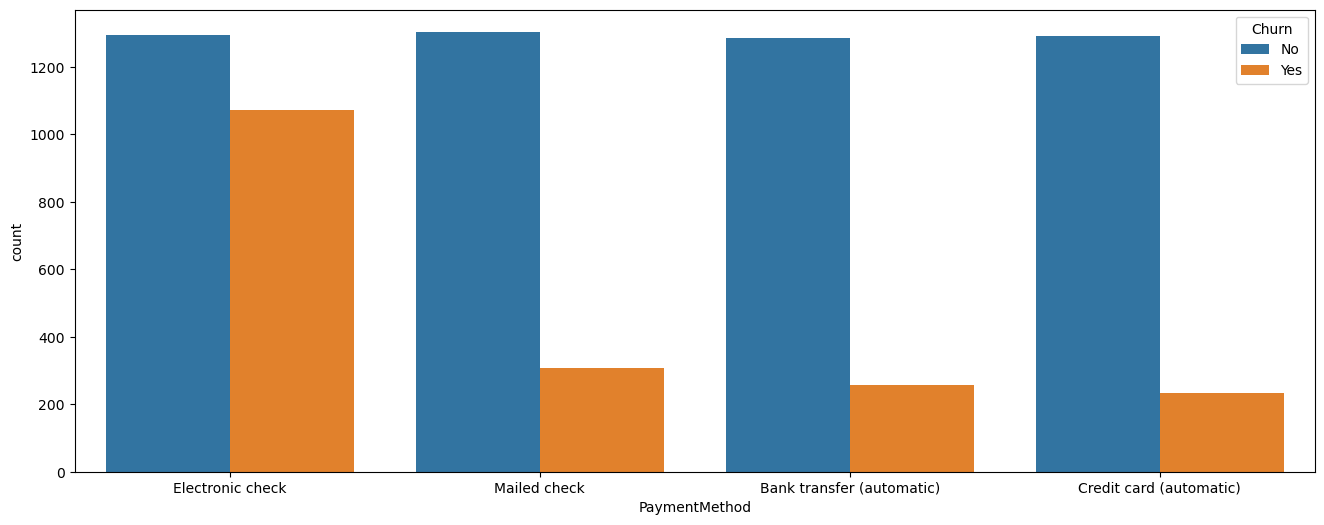

In [54]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='gender', hue='Churn', data=data)
plt.subplot(1, 3, 2)
sns.countplot(x='Partner', hue='Churn', data=data)
plt.subplot(1, 3, 3)
sns.countplot(x='Dependents', hue='Churn', data=data)
plt.show()

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='PhoneService', hue='Churn', data=data)
plt.subplot(1, 3, 2)
sns.countplot(x='MultipleLines', hue='Churn', data=data)
plt.subplot(1, 3, 3)
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.show()

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='OnlineSecurity', hue='Churn', data=data)
plt.subplot(1, 3, 2)
sns.countplot(x='OnlineBackup', hue='Churn', data=data)
plt.subplot(1, 3, 3)
sns.countplot(x='DeviceProtection', hue='Churn', data=data)
plt.show()

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='TechSupport', hue='Churn', data=data)
plt.subplot(1, 3, 2)
sns.countplot(x='StreamingTV', hue='Churn', data=data)
plt.subplot(1, 3, 3)
sns.countplot(x='StreamingMovies', hue='Churn', data=data)
plt.show()

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Contract', hue='Churn', data=data)
plt.subplot(1, 2, 2)
sns.countplot(x='PaperlessBilling', hue='Churn', data=data)
plt.show()

plt.figure(figsize=(16, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.show()


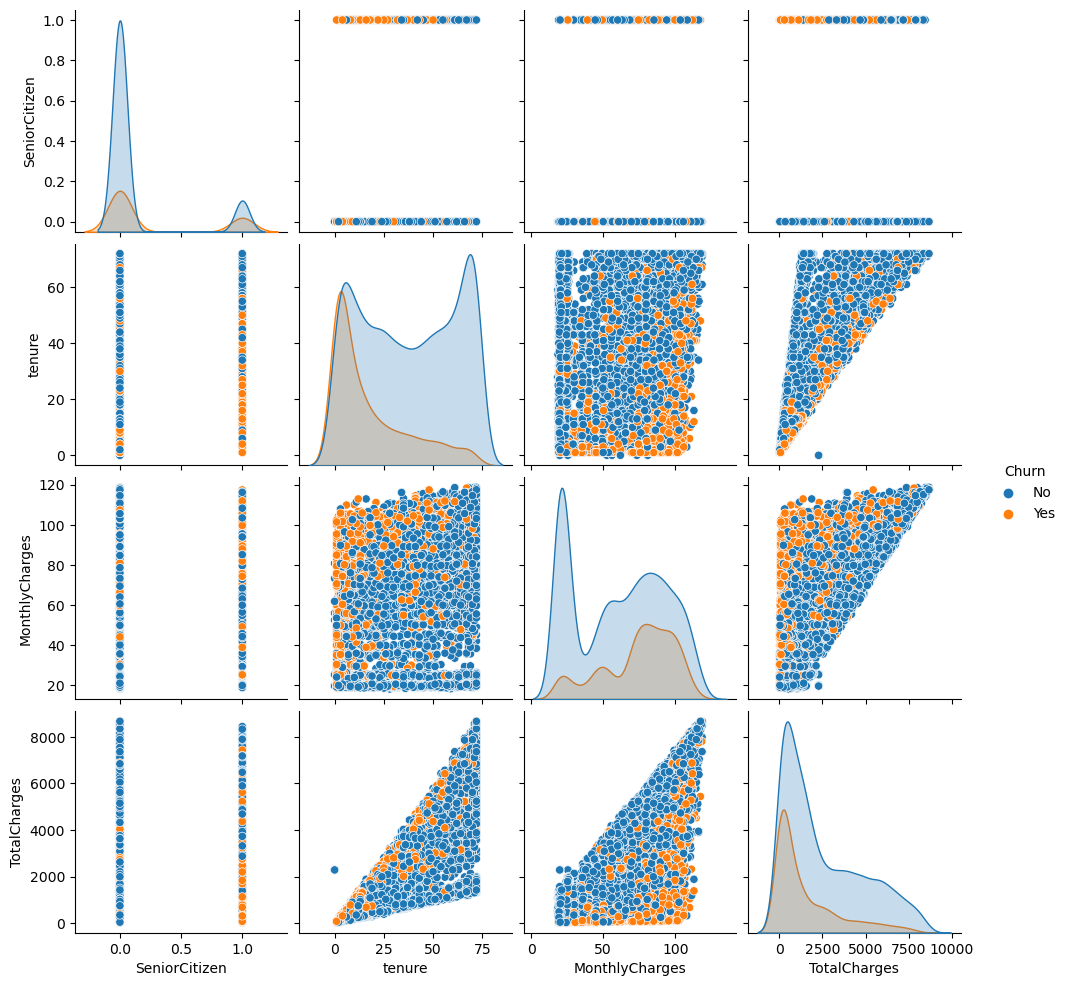

In [58]:
sns.pairplot(data, hue='Churn')
plt.show()


### Observations
- The gender distribution is roughly equal, with slightly more males than females.
- The majority of customers are not senior citizens.The number of customers who are not senior citizens is more than 6 times the number of senior citizens
- The number of customers who have a partner is almost equal to the number of customers who do not have a partner
- The number of customers who do not have dependents is more than twice the number of customers who have dependents
- The number of customers who do not have a phone service is less than 1000 while those who have phone service is more than 6000
- The number of customers who not have multiple lines is more than those who have multiple lines
- The number of customers who have internet service is almost 5 times more than those who do not. With fiber optic being the most popular internet service
- The majority of customers do not have online security.
- The number of customer without online backup and those without is almost equal. This trend is also seen with TechSupport, StreamingTV and StreamingMovies
- The majority of customers have month-to-month contracts while the number of customer with two-year and one year contracts is almost the same
- Slightly more than half of the customers have paperless billing.
- Electronic check is the most common payment method with the other payment methods have almost the same number of customers.


## Prepare Data for Model Building


In [35]:
# Replace whitespace values with NaN
for i in range(len(data)):
    if type(data.loc[i, 'TotalCharges']) == str:
        if data.loc[i, 'TotalCharges'].strip() == "":
            data.loc[i, 'TotalCharges'] = np.nan

# Convert the column to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Replace NaN with the mean or median of the column
mean_TotalCharges = data['TotalCharges'].mean()
data['TotalCharges'].fillna(mean_TotalCharges, inplace=True)

# Encode categorical features using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Drop the target variable 'Churn' from the dataset
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']


**Perform train-test split to partition your data into a training (80%) and test set (20%). Use stratified sampling to make sure each set contains a proportional number of customers who stay or leave the company.**

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Fit a Logistic Regression Model



**Scale your data using an appropriate feature-scaling method.**



In [48]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Fitting a regression model

**Use your model to obtain the probability of churn of each customer given the data available to you.**


In [84]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Obtain the probability of churn for each customer
y_proba_train = log_reg.predict_proba(X_train_scaled)[:, 1]
y_proba_test = log_reg.predict_proba(X_test_scaled)[:, 1]




**As a baseline, evaluate the model on your *training* set.**


In [85]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, roc_auc_score

# Calculate accuracy, precision, recall, and F1 score
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

metrics_train = precision_recall_fscore_support(y_train, y_pred_train)
metrics_test = precision_recall_fscore_support(y_test, y_pred_test)

# Calculate confusion matrix
confusion_train = confusion_matrix(y_train, y_pred_train)
confusion_test = confusion_matrix(y_test, y_pred_test)

# Calculate ROC curve and AUC score
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)

auc_train = roc_auc_score(y_train, y_proba_train)
auc_test = roc_auc_score(y_test, y_proba_test)


Training Set Metrics:
Accuracy: 0.806354277600284
Precision: [0.84715262 0.66237942]
Recall: [0.89852621 0.55117057]
F1 Score: [0.87208348 0.60167945]
Support: [4139 1495]

Confusion Matrix (Training Set):
[[3719  420]
 [ 671  824]]

ROC AUC Score (Training Set): 0.8492847625288774


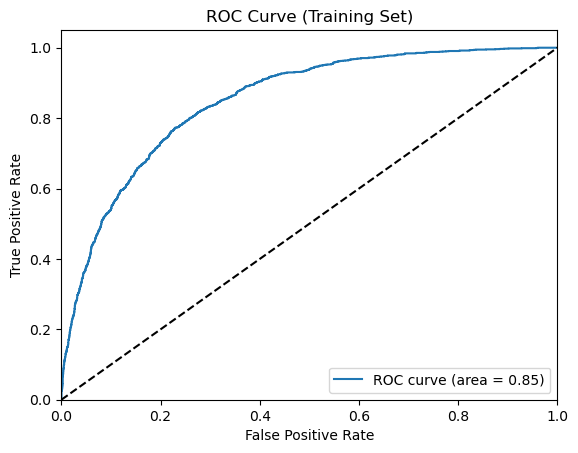

In [86]:
# Print accuracy, precision, recall, and F1 score
print("Training Set Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", metrics_train[0])
print("Recall:", metrics_train[1])
print("F1 Score:", metrics_train[2])
print("Support:", metrics_train[3])

# Print confusion matrix
print("\nConfusion Matrix (Training Set):")
print(confusion_train)

# Print ROC AUC score
print("\nROC AUC Score (Training Set):", auc_train)

# Plot ROC curve
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % auc_train)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend(loc="lower right")
plt.show()


Observations: 

- Accuracy: The accuracy of our model on the training set is 80.64 percent. This means that the model has correctly classified 80.64 percent of the instances in the training set.

- Precision: The precision values are [0.847, 0.662] for the two classes (assuming class 0 is 'No' and class 1 is 'Yes'). This means that, when the model predicts 'No', it is correct 84.7 percent of the time, and when it predicts 'Yes', it is correct 66.2 percent of the time.

- Recall: The recall values are [0.899, 0.551] for the two classes. This means that the model correctly identifies 89.9 percent of the 'No' instances and 55.1 percent of the 'Yes' instances.

- F1 Score: The F1 scores are [0.872, 0.602] for the two classes. The F1 score is the harmonic mean of precision and recall, providing a single metric that balances the trade-off between precision and recall. A higher F1 score is better. In this case, the model has a higher F1 score for the 'No' class (0.872) compared to the 'Yes' class (0.602).

- In the confusion matrix, the rows represent the true classes and the columns represent the predicted classes. The elements in the matrix are:

1.  True Negative (TN): 3719 instances were correctly predicted as 'No'.
2.  False Positive (FP): 420 instances were incorrectly predicted as 'Yes' (they were actually 'No').
3. False Negative (FN): 671 instances were incorrectly predicted as 'No' (they were actually 'Yes').
4.  True Positive (TP): 824 instances were correctly predicted as 'Yes'.

- Overall, our model seems to be performing better on the 'No' class, as evidenced by the higher precision, recall, and F1 score for that class compared to the 'Yes' class.

## Evaluate the Model

**Evaluate the model on the test set. First, obtain basic metrics including accuracy score and precision, recall, F1 score, and support for the two classes.**

In [79]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve

# Calculate accuracy, precision, recall, and F1 score for the test set
y_pred_test = log_reg.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_pred_test)
metrics_test = precision_recall_fscore_support(y_test, y_pred_test)

# Display test set metrics
print("Test Set Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {metrics_test[0]}")
print(f"Recall: {metrics_test[1]}")
print(f"F1 Score: {metrics_test[2]}")
print(f"Support: {metrics_test[3]}")




Test Set Metrics:
Accuracy: 0.8069552874378992
Precision: [0.85096596 0.65838509]
Recall: [0.89371981 0.56684492]
F1 Score: [0.87181904 0.6091954 ]
Support: [1035  374]


**Display the confusion matrix for your model.**

In [81]:
# Display confusion matrix for the test set
confusion_test = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix (Test Set):")
print(confusion_test)


Confusion Matrix (Test Set):
[[925 110]
 [162 212]]


**Display the ROC curve for your model as well as the ROC score.**


Confusion Matrix (Test Set):
[[925 110]
 [162 212]]


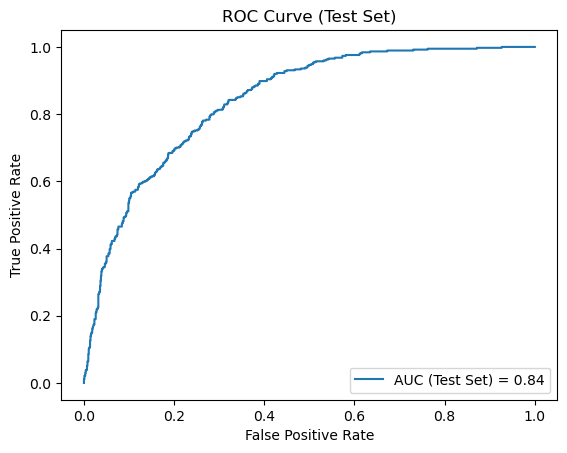

ROC Score (Test Set): 0.8415278100700095


In [80]:
# Display ROC curve and ROC score for the test set
y_proba_test = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
auc_test = roc_auc_score(y_test, y_proba_test)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr_test, tpr_test, label=f'AUC (Test Set) = {auc_test:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.show()

# Display ROC score
print(f"ROC Score (Test Set): {auc_test}")

## Evaluate the Model




## Analysis

**Discuss the performance of your model, especially with regards to the test set.** 

The model's performance on the test set can be characterized as follows:

1.  Accuracy: The model demonstrates an accuracy of 80.70% on the test set, indicating that it correctly classifies 80.70% of the instances. This suggests satisfactory overall performance, as a significant percentage of instances are classified correctly.

2. Precision: The precision values for the two classes are 85.1% and 65.8%. When the model predicts the 'No' class, it is accurate 85.1% of the time, and for the 'Yes' class, it is accurate 65.8% of the time. The model's higher precision in predicting the 'No' class helps reduce false positive errors.

3. Recall: The model exhibits recall values of 89.4% and 56.7% for the 'No' and 'Yes' classes, respectively. While the model has a higher recall for the 'No' class, it encounters difficulties identifying a significant percentage of 'Yes' instances, which could lead to false negatives.

4. F1 Score: The F1 scores, which balance the trade-off between precision and recall, are 0.872 for the 'No' class and 0.609 for the 'Yes' class. The model performs better in predicting the 'No' class but may not be as effective in predicting the 'Yes' class.

5. ROC Score: The test set's ROC score is 0.8415, measuring the model's ability to discriminate between the two classes. A higher score signifies better performance, with 0.5 representing random guessing and 1.0 signifying perfect discrimination. The model exhibits a commendable ability to differentiate between the two classes with a score of 0.8415.

- In conclusion, the model performs well on the test set, displaying good accuracy, precision, and recall for the 'No' class. Nevertheless, it encounters difficulties with the 'Yes' class, particularly in terms of recall. This indicates that the model might require further tuning or the incorporation of additional features to enhance its performance in predicting the 'Yes' class.

**Use your confusion matrix and ROC score to reason about how Acme can best apply its incentives to keep the most profitable customers. Note that while all parts of your work on this project are important, this is the part that senior management is most likely to read.**


- **Prioritize True Positives**: Concentrate on customers who are predicted to churn with a high degree of certainty. By directing tailored incentives to this group, Acme can potentially retain a substantial number of its most profitable customers who are at risk of leaving.

- **Address False Negatives** : Enhance the model's capacity to identify customers likely to churn but are currently misclassified as not churning. By reaching out to these customers, Acme can expand its retention efforts to this previously unnoticed group.

- **Minimize False Positives** : Refine the model to decrease the number of customers inaccurately predicted to churn, thus preventing unnecessary expenditure on incentives for customers who are not at risk of leaving.

- **Segment Customers**: Acme may consider categorizing customers based on their profitability, churn risk, and other pertinent factors. By targeting the most profitable customers with a higher churn risk, Acme can optimize the return on investment for its incentive programs.


Here are some more tangible incentives that ACME could put in place: 

- Present exclusive discounts or promotions to customers at risk of churning. These discounts could be applied to their existing plans or for upgrading to a higher-tier plan, motivating them to continue with Acme

-  Establish a loyalty program that appreciates customers for their ongoing business. Customers can accumulate points based on their usage or duration with the company, which can be exchanged for various rewards, such as discounts, complimentary products, or special offers.

-  Offer a free upgrade to a premium service or feature for a limited period. This enables customers to enjoy the advantages of the premium offering and could persuade them to stay with Acme

## Conclusion

**Briefly summarize what you accomplished in this lab in terms of the imagined data analytics problem?** 



During this lab, we addressed a hypothetical data analytics challenge that focused on predicting customer churn for Acme Inc. We commenced with an exploratory data analysis to gain insights into the dataset and pinpoint any potential concerns or patterns. Following that, we preprocessed the data, which involved managing missing values, encoding categorical variables, and scaling numerical attributes.

Subsequently, we constructed a logistic regression model to forecast customer churn and assessed its performance using a range of metrics, including accuracy, precision, recall, and F1 score. We evaluated the model on both the training and test sets to confirm its ability to generalize to new data.

Lastly, we scrutinized the model's performance, particularly on the test set, and offered suggestions on how Acme can optimize incentives to retain its most valuable customers. We recommended approaches such as prioritizing true positives, addressing false negatives, reducing false positives, and categorizing customers. Additionally, we put forth concrete incentives like discounted pricing, loyalty schemes, complimentary upgrades, and early access to new products or services.

**Briefly summarize what *you* learned in this lab.**

In this project, I learned how to : 

- Perform exploratory data analysis to understand the dataset, identify trends, and address potential issues.
- Preprocess the data by managing missing values, encoding categorical variables, and scaling numerical features.
- Build a logistic regression model to predict customer churn and evaluate its performance using various metrics, such as accuracy, precision, recall, and F1 score.
- Assess the model's performance on both training and test sets to ensure generalization to unseen data.
- Provide recommendations for a company (Acme Inc.) on how to apply incentives effectively to retain its most profitable customers, based on the model's performance and results.



## Acknowledgements 

I would like to express my gratitude to my lab partner Johnson. He and I collaborated extensively, discussing the optimal approach for various scenarios and assisting each other in problem-solving. Our teamwork allowed us to gain a deeper understanding of the dataset and explore it more thoroughly. I would also like to thank Dr. Zhang for answering our questions during office hours and lab hours. The suggestions and insights provided were of immense value and this project would not have been accomplished without their contribution.


## References

1. Brownlee, Jason. "How to Encode Categorical Data for Deep Learning in Python." Machine Learning Mastery, July 14, 2019. https://machinelearningmastery.com/how-to-encode-categorical-data-for-deep-learning-in-python/

2. Oliphant, Travis E. "NumPy: A guide to NumPy." USA: Trelgol Publishing, 2006. Available at: https://numpy.org/doc/stable/numpy-user.pdf

3. Hunter, John D. "Matplotlib: A 2D graphics environment." Computing in science & engineering 9, no. 3 (2007): 90-95. Available at: https://matplotlib.org/stable/contents.html

4. Sosnovik, Ilya. "Understanding Logistic Regression." Towards Data Science, June 23, 2018. https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

5. Wang, Susan. "Handling Imbalanced Datasets in Machine Learning." Towards Data Science, July 20, 2018. https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28

6. Zhang, Li. "Exploratory Data Analysis: Techniques for Data Profiling." Medium, June 16, 2019. https://medium.com/@li.zhang_84229/exploratory-data-analysis-techniques-for-data-profiling-17e1a4ff12e4

7. Sharma, Tavish. "Customer Churn Prediction using Machine Learning: Main Approaches and Models." KDnuggets, 2019. https://www.kdnuggets.com/2019/05/customer-churn-prediction-machine-learning.html

8. Jain, Rishabh. "The Ultimate Guide to Customer Churn Analysis." CleverTap, July 14, 2020. https://clevertap.com/blog/customer-churn-analysis/

9. Kumar, Amit. "A Comprehensive Guide to the ROC Curve." Medium, November 30, 2020. https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

10. OpenAI. "ChatGPT by OpenAI." Accessed March 13, 2023. https://www.openai.com/chatgpt